#Points to be noted before running

###1. Upload the .ipynb file and the provided dataset to the root directory of Jupyter notebook and run cells of code.

###2. Used libraries and versions
    ###pandas 1.2.3
    ###scikit-learn 1.0.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
%matplotlib inline
from datetime import datetime
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

In [ ]:
root = '/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/'
col_data = {
    'PRECTOTCORR': {'full' : 'Precipitation Corrected', 'unit': 'mm/hour'},			
    'RH2M': {'full' : 'Relative Humidity at 2 Meters', 'unit': '%'},			
    'PS': {'full' : 'Surface Pressure', 'unit' :  'kPa'},			
    'WS2M': {'full' : 'Wind Speed at 2 Meters', 'unit' : 'm/s'},			
    'T2M': {'full' : 'Temperature at 2 Meters', 'unit' : 'C'}			
}

In [ ]:
for filename in glob.glob(os.path.join(root, '*.csv')):
   with open(os.path.join(os.getcwd(), filename), 'r') as f:
      if(f.name == "/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/west_bengal_isro.csv"):
        continue
      if(f.name == "/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/himachal_pradesh_isro.csv"):
        continue
      output = (f.name.split('/')[-1]).lower()
      print(f.name)
      df = pd.read_csv(f.name)
      df['Datetime'] = pd.to_datetime(dict(year=df.YEAR, month=df.MO, day=df.DY, hour=df.HR))
      df = df.drop(['YEAR', 'MO', 'DY', 'HR'], axis=1)
      df.to_csv(root+'corrected/' + output, index=False)

/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/Mumbai.csv
/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/Ranchi.csv
/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/Srinagar.csv
/content/drive/MyDrive/Semester 5 - Project REAPS/Documents/6 sem/Code/Data/Kolkata.csv


In [ ]:
df = pd.read_csv(root+'corrected/' + 'srinagar.csv')

In [ ]:
df.describe()

,PRECTOTCORR,RH2M,PS,WS2M,T2M
count,105216.000000,105216.000000,105216.000000,105216.000000,105216.000000
mean,0.107313,58.836390,74.284137,1.258036,8.866607
std,0.388187,20.739216,0.274776,15.139870,8.830953
min,0.000000,4.380000,72.640000,-999.000000,-20.510000
25%,0.000000,42.690000,74.100000,0.780000,2.120000
50%,0.000000,58.750000,74.300000,1.190000,9.280000
75%,0.030000,76.000000,74.470000,2.050000,15.640000
max,12.720000,100.000000,75.220000,9.750000,29.550000


In [ ]:
df

,PRECTOTCORR,RH2M,PS,WS2M,T2M,Datetime
0,0.00,25.44,74.31,1.18,-1.77,2010-01-01 00:00:00
1,0.00,24.25,74.31,1.30,-1.81,2010-01-01 01:00:00
2,0.00,25.00,74.29,1.41,-2.40,2010-01-01 02:00:00
3,0.00,25.44,74.25,1.46,-3.00,2010-01-01 03:00:00
4,0.00,25.44,74.23,1.51,-3.65,2010-01-01 04:00:00
...,...,...,...,...,...,...
105211,0.16,64.31,74.57,1.03,-2.81,2022-01-01 19:00:00
105212,0.38,69.50,74.57,1.07,-3.38,2022-01-01 20:00:00
105213,0.64,73.06,74.56,1.03,-3.66,2022-01-01 21:00:00
105214,0.77,75.75,74.55,0.96,-3.74,2022-01-01 22:00:00


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97e275c50>,
      dtype=object)

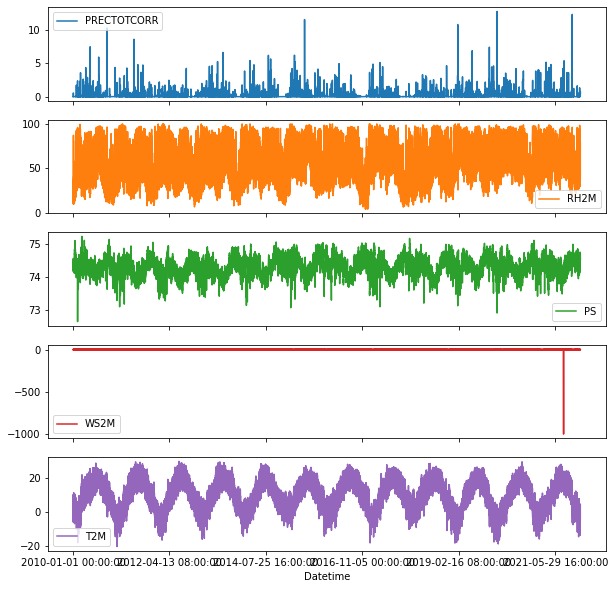

In [ ]:
df.set_index('Datetime')[['PRECTOTCORR',	'RH2M',	'PS',	'WS2M',	'T2M']].plot(subplots=True,figsize=(10,10))

In [ ]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
print("Number of Categorical Features: {}".format(len(categorical_features)))
print("Categorical Features: ",categorical_features)

Number of Categorical Features: 1
Categorical Features:  ['Datetime']


In [ ]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
print("Number of Numerical Features: {}".format(len(numerical_features)))
print("Numerical Features: ",numerical_features)

Number of Numerical Features: 5
Numerical Features:  ['PRECTOTCORR', 'RH2M', 'PS', 'WS2M', 'T2M']


In [ ]:
for each_feature in categorical_features:
   unique_values = len(df[each_feature].unique())
   print("Cardinality(no. of unique values) of {} are: {}".format(each_feature, unique_values))

Cardinality(no. of unique values) of Datetime are: 105216


In [ ]:
categorical_features = [column_name for column_name in df.columns if df[column_name].dtype == 'O']
df[categorical_features].isnull().sum()

Datetime    0
dtype: int64

In [ ]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']
df[numerical_features].isnull().sum()

PRECTOTCORR    0
RH2M           0
PS             0
WS2M           0
T2M            0
dtype: int64

In [ ]:
df.head()

,PRECTOTCORR,RH2M,PS,WS2M,T2M,Datetime
0,0.0,25.44,74.31,1.18,-1.77,2010-01-01 00:00:00
1,0.0,24.25,74.31,1.30,-1.81,2010-01-01 01:00:00
2,0.0,25.00,74.29,1.41,-2.40,2010-01-01 02:00:00
3,0.0,25.44,74.25,1.46,-3.00,2010-01-01 03:00:00
4,0.0,25.44,74.23,1.51,-3.65,2010-01-01 04:00:00


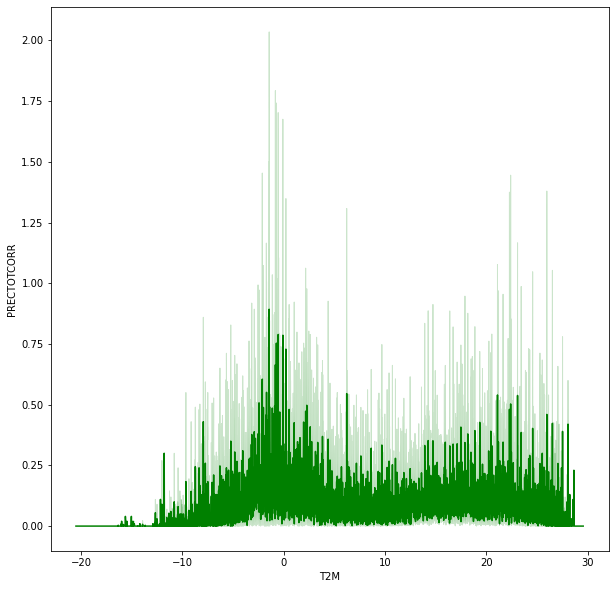

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='PRECTOTCORR',x='T2M',color='green')

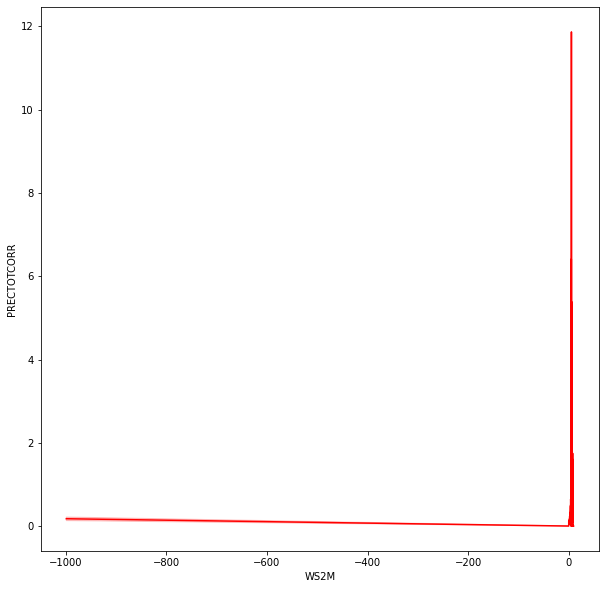

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='PRECTOTCORR',x='WS2M',color='red')

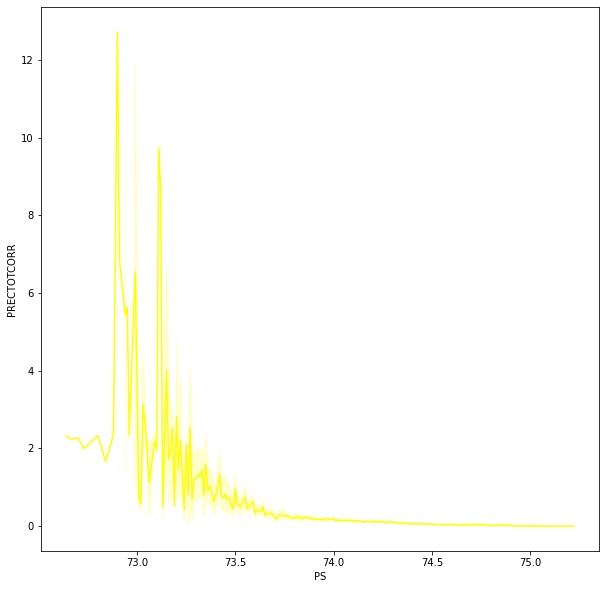

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='PRECTOTCORR',x='PS',color='yellow')

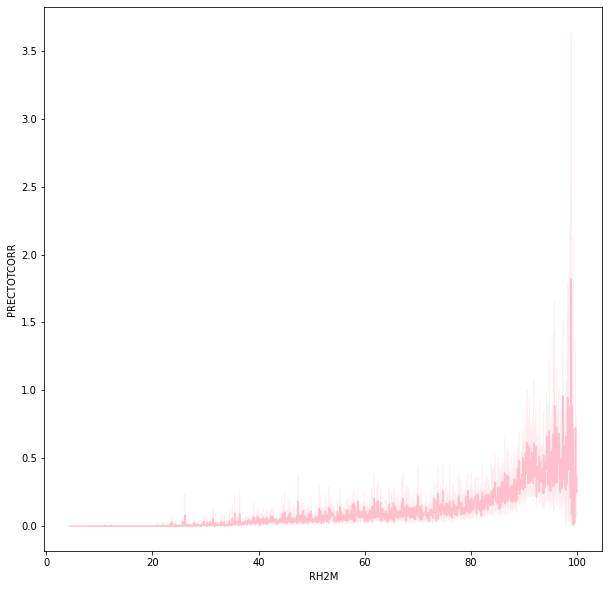

In [ ]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df,y='PRECTOTCORR',x='RH2M',color='pink')

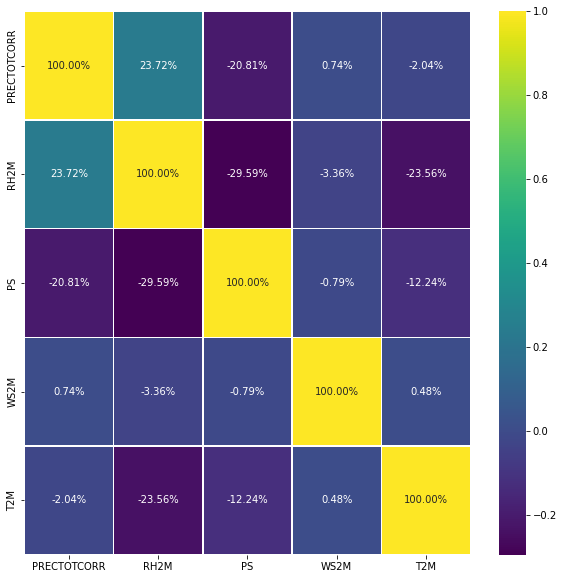

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), linewidths=0.5, annot=True, fmt=".2%", cmap = 'viridis')

In [ ]:
X = df.drop(['PRECTOTCORR', 'Datetime'], axis=1)
y = df['PRECTOTCORR']

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_

array([0.24973689, 0.22806597, 0.2689556 , 0.25324154])

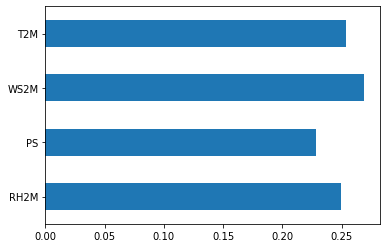

In [ ]:
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.plot(kind='barh')

In [ ]:
datetime_temp = df['Datetime']
df = df.drop(['Datetime'], axis=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb97ba61690>,
      dtype=object)

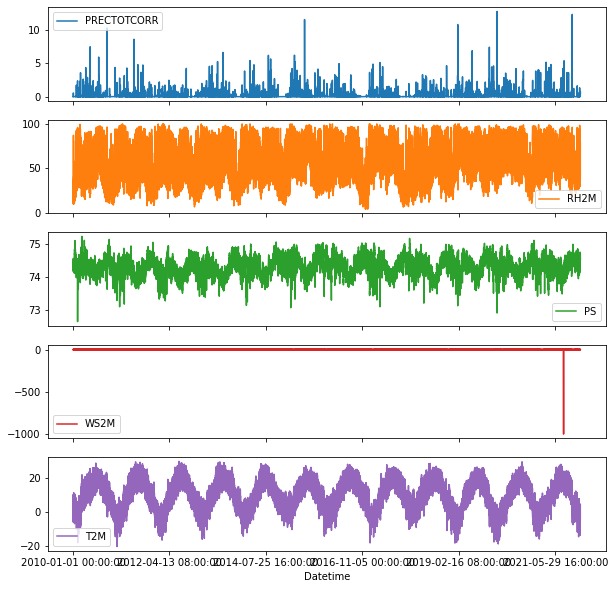

In [ ]:
df['Datetime'] = datetime_temp
df.set_index('Datetime')[['PRECTOTCORR',	'RH2M',	'PS',	'WS2M',	'T2M']].plot(subplots=True, figsize=(10,10))

In [ ]:
features=data_scaled
target=data_scaled[:,0]

In [ ]:
TimeseriesGenerator(features, target, length=24, sampling_rate=1, batch_size=1)[0]

(array([[[-2.76448619e-01, -1.61030909e+00,  9.41229231e-02,
          -5.15437728e-03, -1.20447451e+00],
         [-2.76448619e-01, -1.66768858e+00,  9.41229231e-02,
           2.77175231e-03, -1.20900405e+00],
         [-2.76448619e-01, -1.63152504e+00,  2.13360419e-02,
           1.00373711e-02, -1.27581483e+00],
         [-2.76448619e-01, -1.61030909e+00, -1.24237720e-01,
           1.33399251e-02, -1.34375798e+00],
         [-2.76448619e-01, -1.61030909e+00, -1.97024602e-01,
           1.66424791e-02, -1.41736307e+00],
         [-2.76448619e-01, -1.56498412e+00, -1.60631161e-01,
           2.12660547e-02, -1.50002725e+00],
         [-2.76448619e-01, -1.47192326e+00, -5.14508392e-02,
           2.52291195e-02, -1.58269143e+00],
         [-2.76448619e-01, -1.33305525e+00,  9.41229231e-02,
           2.25870763e-02, -1.56457325e+00],
         [-2.76448619e-01, -1.23372605e+00,  2.76090126e-01,
           1.59819683e-02, -1.10255977e+00],
         [-2.76448619e-01, -2.11949180e+00,  4

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=123, shuffle = False)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(84172, 5)
(21044, 5)


In [ ]:
win_length=10
batch_size=32
num_features=5
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape= (win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5)) 
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3)) 
model.add(tf.keras.layers.Dense(1))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 128)           68608     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 128)           131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 10, 128)           0         
                                                                 
 dropout (Dropout)           (None, 10, 128)           0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

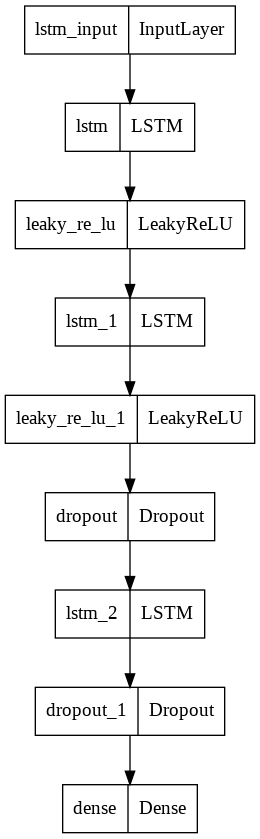

In [ ]:
model.summary()

tf.keras.utils.plot_model(
    model,
    to_file=root+ "model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=2,
                                                    mode='min')

model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                    validation_data=test_generator,
                    shuffle=False,
                    callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if sys.path[0] == '':


2631/2631 [==============================] - 53s 17ms/step - loss: 0.2210 - mean_absolute_error: 0.1552 - val_loss: 0.2475 - val_mean_absolute_error: 0.1118
Epoch 2/50
2631/2631 [==============================] - 42s 16ms/step - loss: 0.1313 - mean_absolute_error: 0.1142 - val_loss: 0.2550 - val_mean_absolute_error: 0.1597
Epoch 3/50
2631/2631 [==============================] - 42s 16ms/step - loss: 0.1218 - mean_absolute_error: 0.1120 - val_loss: 0.1906 - val_mean_absolute_error: 0.1389
Epoch 4/50
2631/2631 [==============================] - 42s 16ms/step - loss: 0.1222 - mean_absolute_error: 0.1122 - val_loss: 0.1908 - val_mean_absolute_error: 0.1741
Epoch 5/50
2631/2631 [==============================] - 42s 16ms/step - loss: 0.1077 - mean_absolute_error: 0.1070 - val_loss: 0.1543 - val_mean_absolute_error: 0.1075
Epoch 6/50
2631/2631 [==============================] - 42s 16ms/step - loss: 0.1047 - mean_absolute_error: 0.1039 - val_loss: 0.1852 - val_mean_absolute_error: 0.1053
Epo

In [ ]:
model.evaluate_generator(test_generator, verbose=0)
predictions=model.predict_generator(test_generator)
x_test[:,1:][win_length:]
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
df_final=df[predictions.shape[0]*-1:]
df_final['rf_pred']=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_final.count()

PRECTOTCORR    21034
RH2M           21034
PS             21034
WS2M           21034
T2M            21034
Datetime       21034
rf_pred        21034
dtype: int64

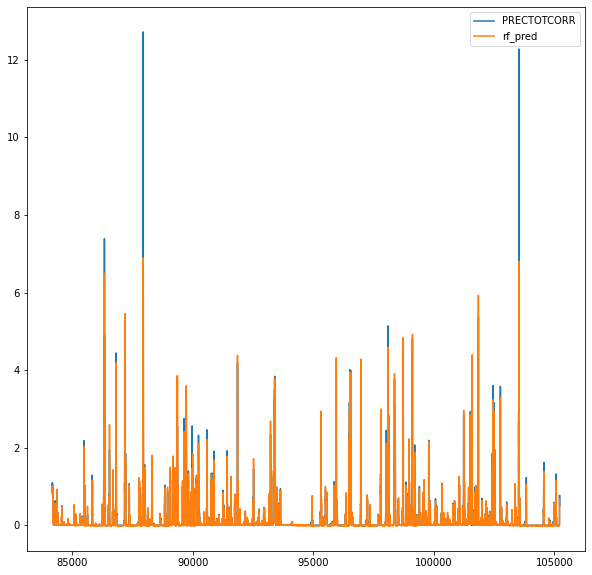

In [ ]:
df_final[['PRECTOTCORR','rf_pred']].plot(figsize=(10,10))